In [1]:
import requests

url = 'https://services.swpc.noaa.gov/json/solar-cycle/swpc_observed_ssn.json'
response = requests.get(url)
print(response.status_code)
contents = response.text

200


In [2]:
import json

info = json.loads(contents)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(info)
df.head()

,Obsdate,swpc_ssn
0,1996-03-12T00:00:00,0
1,1996-08-18T00:00:00,14
2,1996-08-19T00:00:00,0
3,1996-08-20T00:00:00,0
4,1996-08-21T00:00:00,12


In [16]:
def time_to_float(t):
    t = t.split('-')
    return float(t[0]) + float(t[1])/12

In [17]:
x = df['Obsdate'].apply(time_to_float)
y = df['swpc_ssn']

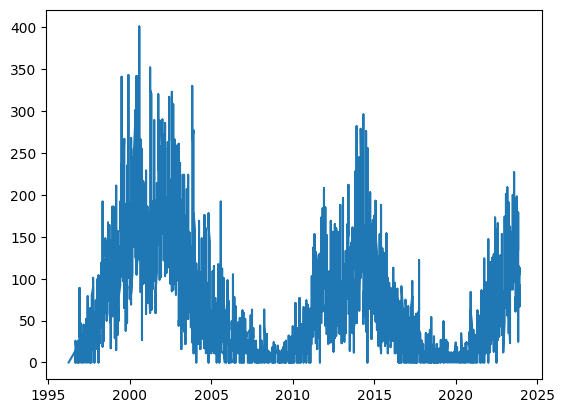

In [18]:
plt.plot(x, y)

In [20]:
df = df[1:]

<AxesSubplot:>

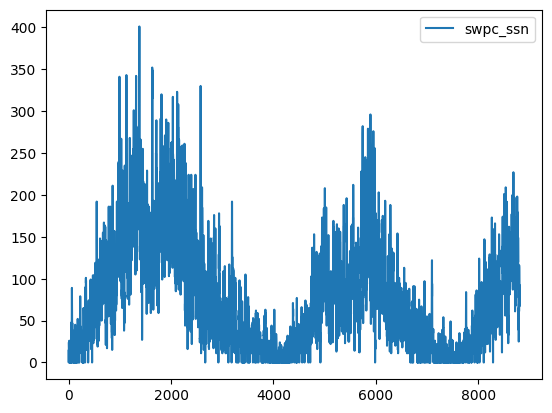

In [24]:
df.plot()

In [23]:
import pickle

with open('./data/ssn.pkl', 'wb') as f:
    pickle.dump(df, f)